In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('developer_survey_2017/survey_results_public.csv')
df_schema = pd.read_csv('developer_survey_2017/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print('There are {} of rows and {} of columns in the 2017 survey data.'.format(num_rows, num_cols))

There are 51392 of rows and 154 of columns in the 2017 survey data.


In [3]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [4]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75]) #Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

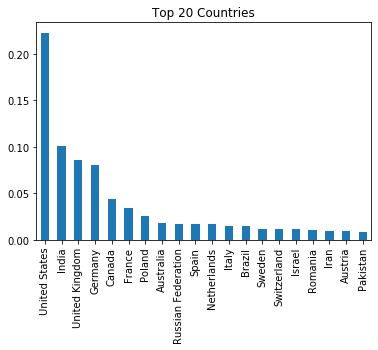

In [5]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 20 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:20]/df.shape[0]).plot(kind="bar");
plt.title("Top 20 Countries");

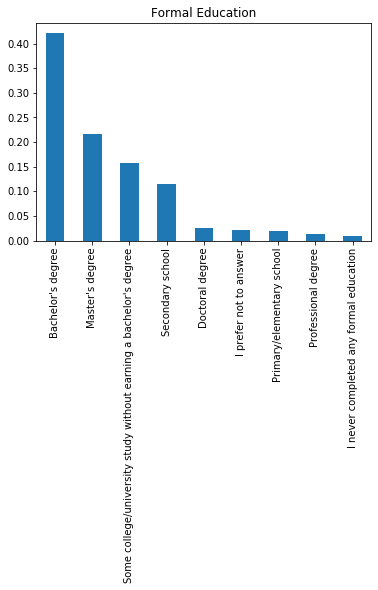

In [6]:
ed_vals = df.FormalEducation.value_counts()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

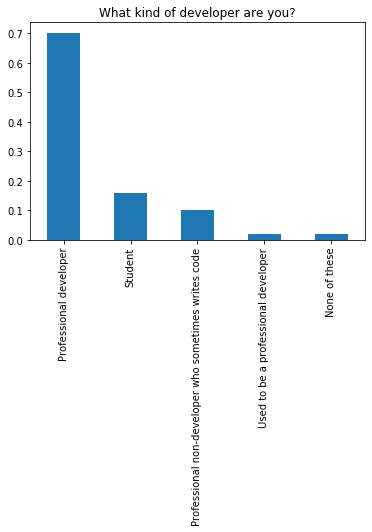

In [7]:
status_vals = df.Professional.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

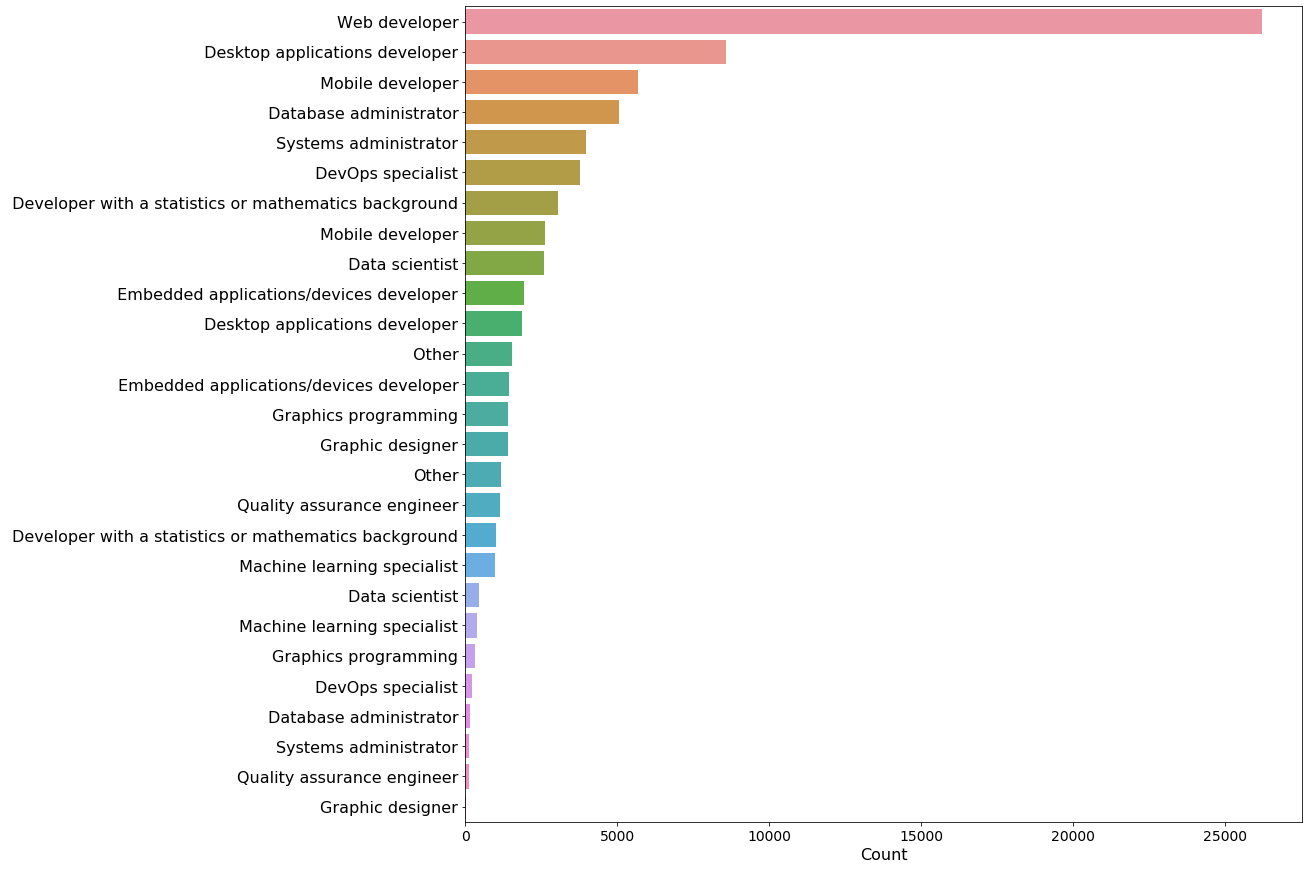

In [8]:
test_df = pd.melt(df.DeveloperType.str.get_dummies(sep=';'))
fig, ax = plt.subplots(figsize=(15,15))

g1 = sns.countplot(data=test_df.loc[test_df['value']!=0], y='variable'
              , order=test_df[test_df['value']!=0]['variable'].value_counts().index)

g1.set(ylabel=None)# remove the axis label
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(None)
plt.xlabel('Count',fontsize = 16);

In [ ]:
'''
from the plot it appears that some types are duplicated which could be related to extra space int he value so 
we need to eliminate those cases to get a better view
''' 

dev_type_df = df.DeveloperType.str.replace('; ',';').str.get_dummies(sep=';')


In [ ]:
dev_df = pd.melt(dev_type_df)
fig, ax = plt.subplots(figsize=(15,15))

g1 = sns.countplot(data=dev_df.loc[dev_df['value']!=0], y='variable'
              , order=dev_df[dev_df['value']!=0]['variable'].value_counts().index)

#g1.set(xticklabels=[])  # remove the tick labels
#g1.set(title='Exercise: Pulse by Time for Exercise Type')  # add a title
g1.set(ylabel=None)# remove the axis label
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(None)
plt.xlabel('Count',fontsize = 16)
for p in g1.patches:
    ax.annotate('{}'.format(p.get_width()),
                    xy=(p.get_width()*1.02,p.get_y() + p.get_height() / 2),
                   # xytext=(p.get_width(), p.get_height()),  
                    horizontalalignment='center', verticalalignment='center',
                    size='14',weight='bold', clip_on=False)
plt.show();


In [ ]:
df.loc[(df.Gender!='Male') & (df.Gender!='Female'),'Gender']='Other'

In [ ]:
df.Country.value_counts()
fig, ax = plt.subplots(figsize=(15,15))
g1 = sns.countplot(data=df, hue ='Gender', y='Country', order = df.Country.value_counts().iloc[:20].index)
plt.title('Top 20 Countries from 2017 Stackoverflow Survey')
plt.legend(bbox_to_anchor=(1.1, 1.), loc='upper right', borderaxespad=0.);

In [ ]:
# Data Scientise and machine learnign profession 
DS_df = df[df.DeveloperType.str.contains('Data scientist') | df.DeveloperType.str.contains('Machine learning')]

In [ ]:
DS_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
g1 = sns.countplot(data=DS_df, hue ='Gender', y='Country', order = DS_df.Country.value_counts().iloc[:10].index)
plt.title('Top 10 Countries from 2017 Stackoverflow Survey')
plt.legend(bbox_to_anchor=(1.1, 1.), loc='upper right', borderaxespad=0.);

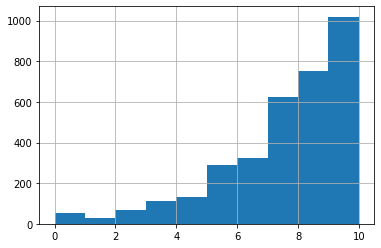

In [73]:
DS_df.JobSatisfaction.hist();

In [23]:
desired_columns = ['Respondent', 'Professional', 'ProgramHobby', 'Country',
       'University', 'EmploymentStatus', 'FormalEducation',
       'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType',
       'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast',
       'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction',
       #'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance',
       #'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       #'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF',
       'ProblemSolving', 'BuildingThings', 'LearningNewTech',
       'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI',
       'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers',
       'SeriousWork', 'InvestTimeTools', 'WorkPayCare',
       'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers',
       'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob',
       'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp',
       'AssessJobDept', 'AssessJobTech', 'AssessJobProjects',
       'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute',
       'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel',
       'AssessJobDiversity', 'AssessJobProduct', 'AssessJobFinances',
       'ImportantBenefits','EducationImportant', 'EducationTypes',
       'SelfTaughtTypes','HaveWorkedLanguage', 'WantWorkLanguage',
       'HaveWorkedFramework', 'WantWorkFramework', 'HaveWorkedDatabase',
       'WantWorkDatabase', 'HaveWorkedPlatform', 'WantWorkPlatform',
        #'ClickyKeys', 'JobProfile', 'ResumePrompted',
       #'LearnedHiring', 'ImportantHiringAlgorithms',
       #'ImportantHiringTechExp', 'ImportantHiringCommunication',
       #'ImportantHiringOpenSource', 'ImportantHiringPMExp',
        'Gender','Race','Salary','ExpectedSalary']
                   

In [17]:
#desired_columns = ['Respondent','Professional','Country','EmploymentStatus','FormalEducation','MajorUndergrad','HomeRemote',
                 # 'CareerSatisfaction','JobSatisfaction','Gender','Salary','ExpectedSalary']

In [24]:
new_df = df[desired_columns]

In [25]:
new_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,Gender,Race,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,iOS,iOS,Male,White or of European descent,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,.NET Core,.NET Core,MySQL; SQLite,MySQL; SQLite,Amazon Web Services (AWS),Linux Desktop; Raspberry Pi; Amazon Web Servic...,Male,White or of European descent,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,NaN,NaN,MySQL,NaN,NaN,NaN,Male,White or of European descent,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,React,Hadoop; Node.js; React,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Male,White or of European descent,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN


In [26]:
new_df.Gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [27]:
new_df[(new_df.Gender =='Male') | (new_df.Gender=='Female') |(new_df.Gender=='Transgender') ].Gender.value_counts()

Male      31589
Female     2600
Name: Gender, dtype: int64

In [28]:
new_df.loc[((new_df.Gender !='Male') & (new_df.Gender!='Female')  & (new_df.Gender!='Transgender')),'Gender'] = 'Other'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
# Check the Gender Distribution
new_df.Gender.value_counts()/new_df.shape[0]*100

Male      61.466765
Other     33.474082
Female     5.059153
Name: Gender, dtype: float64

In [30]:
def cat_rate(df,cat_col,cat_val,df_col):
    return (df[df[cat_col] == cat_val][df_col].value_counts())/df[df[cat_col] == cat_val].shape[0]*100

In [31]:
cat_rate(new_df,'Gender','Female','FormalEducation')

Bachelor's degree                                                    50.807692
Master's degree                                                      26.538462
Some college/university study without earning a bachelor's degree    11.230769
Secondary school                                                      5.500000
Doctoral degree                                                       3.769231
Professional degree                                                   1.192308
I prefer not to answer                                                0.730769
Primary/elementary school                                             0.153846
I never completed any formal education                                0.076923
Name: FormalEducation, dtype: float64

In [32]:
cat_rate(new_df,'Gender','Male','FormalEducation')

Bachelor's degree                                                    42.426161
Master's degree                                                      22.207097
Some college/university study without earning a bachelor's degree    16.863465
Secondary school                                                     11.029156
Doctoral degree                                                       2.614834
Primary/elementary school                                             1.741112
I prefer not to answer                                                1.307417
Professional degree                                                   1.231441
I never completed any formal education                                0.579316
Name: FormalEducation, dtype: float64

In [33]:
cat_rate(new_df,'Gender','Transgender','FormalEducation')

Series([], Name: FormalEducation, dtype: float64)

In [34]:
cat_rate(new_df,'Gender','Other','FormalEducation')

Bachelor's degree                                                    40.027902
Master's degree                                                      19.973260
Some college/university study without earning a bachelor's degree    14.590478
Secondary school                                                     13.259315
I prefer not to answer                                                3.935360
Primary/elementary school                                             2.865779
Doctoral degree                                                       2.232169
Professional degree                                                   1.714817
I never completed any formal education                                1.400918
Name: FormalEducation, dtype: float64

In [35]:
cat_rate(new_df,'Gender','Female','CareerSatisfaction')

8.0     21.769231
7.0     19.692308
9.0     11.653846
6.0      9.923077
10.0     8.576923
5.0      6.500000
4.0      3.384615
3.0      2.423077
2.0      1.076923
1.0      0.538462
0.0      0.500000
Name: CareerSatisfaction, dtype: float64

In [36]:
cat_rate(new_df,'Gender','Male','CareerSatisfaction')

8.0     23.862737
7.0     19.513122
9.0     12.200450
10.0    10.696762
6.0      9.386179
5.0      5.482921
4.0      2.386907
3.0      2.003862
2.0      0.886385
0.0      0.610972
1.0      0.284909
Name: CareerSatisfaction, dtype: float64

In [37]:
cat_rate(new_df,'Gender','Other','JobSatisfaction')

8.0     14.468407
7.0     13.247689
6.0      8.254374
9.0      8.225310
10.0     8.050921
5.0      7.335930
4.0      3.441260
3.0      3.005290
2.0      1.563681
0.0      1.057955
1.0      0.755682
Name: JobSatisfaction, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


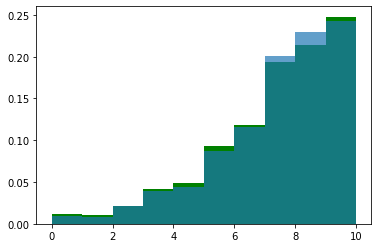

In [38]:
plt.hist(new_df[new_df.Gender=='Female'].JobSatisfaction, alpha = 1, color= 'g',density=True);
plt.hist(new_df[new_df.Gender=='Male'].JobSatisfaction, alpha = 0.7,density=True);


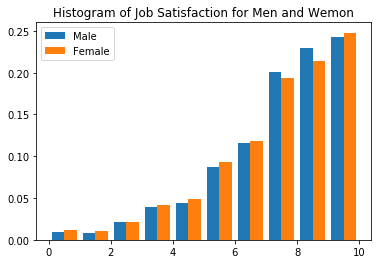

In [39]:
genders = ['Male','Female']
plt.hist([new_df.loc[new_df.Gender == x, 'JobSatisfaction'] for x in genders], label=genders,density=True);
plt.legend(genders);
plt.title('Histogram of Job Satisfaction for Men and Wemon');


In [40]:
sum(new_df[new_df.Gender=='Female']['JobSatisfaction'].isnull())/new_df[new_df.Gender=='Female']['JobSatisfaction'].shape[0]

0.18076923076923077

In [41]:
df_dropna = new_df.dropna(subset=['JobSatisfaction'],axis=0)


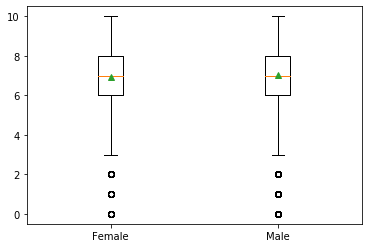

In [42]:
data_to_plot = [df_dropna[df_dropna.Gender=='Female']['JobSatisfaction'], (df_dropna[df_dropna.Gender=='Male']['JobSatisfaction'])]

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot,showmeans=True)

ax.set_xticklabels(['Female','Male']);

In [43]:
np.sum(new_df[new_df.Gender=='Male'].Salary.isnull())/new_df[new_df.Gender=='Male'].shape[0]

0.6623508183228339

In [44]:
np.sum(new_df[new_df.Gender=='Female'].Salary.isnull())/new_df[new_df.Gender=='Female'].shape[0]

0.685

In [45]:
# Replace null Salary with min values
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

NameError: name 'drop_sal_df' is not defined

In [46]:
# Number of Countries participated in the survey
(new_df.Country.nunique())

201

In [ ]:
(np.sum(new_df.isnull())/np.sum(new_df.shape[0])>0.5)

In [75]:
def get_description(column_name, schema=df_schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [81]:
cous_ed_vals = df.CousinEducation.value_counts()#Provide a pandas series of the counts for each CousinEducation status

cous_ed_vals # assure this looks right

Take online courses; Buy books and work through the exercises                                                      711
Take online courses                                                                                                551
None of these                                                                                                      523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                           479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                 465
                                                                                                                  ... 
Get a job as a QA tester; Take online courses; Participate in hackathons; Other                                      1
Bootcamp; Participate in online coding competitions; Buy books and work through the exercises; Other                 1
Master's degree; Get a job as a QA tester; Parti

In [82]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

NameError: name 't' is not defined